# HMC法

In [196]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy.random import choice
from scipy import integrate

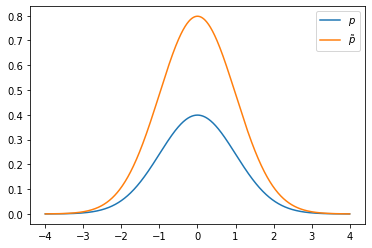

In [197]:
# [0,12]の1000個のデータ
range_min,range_max=-4,4
n_samples=1000
x=np.linspace(range_min, range_max,n_samples)

norm=stats.norm(loc=0, scale=1)
gamma=stats.gamma(a=4)
# 正規化定数,
Z_p=2
# p(z),gauss
def childa_p(z):
    # return gamma.pdf(z)*Z_p
    return norm.pdf(z)*Z_p

# p(z),正規化された値，サンプリングできない，特定の範囲では厳密には確率分布ではない
p_data=childa_p(x)/Z_p
plt.plot(x,p_data,label='$p$')

# サンプリング可能な~p(z)
childa_p_data=childa_p(x)
plt.plot(x,childa_p_data,label='$\~p$')

plt.legend()
plt.show()

In [198]:
mu=0
sigma=1

In [199]:
def potensial(x):
    return -1*np.log(childa_p(x))

# 運動エネルギー
def momentum(p, tau):
    return p**2/(2*tau**2)

# ハミルトニアン
# 運動エネルギーとポテンシャルエネルギーの和
def Hamiltonian(x, p, tau):
    return momentum(p, tau) + potensial(x)

# リープ・フロッグ法
def proceed_leapflog(epsilon, x, p, tau):
    # 運動エネルギーの導関数
    def d_momentum(p, tau):
        return p/tau**2
    
    x += -0.5*epsilon*d_momentum(p, tau)
    p += epsilon*x
    x += -0.5*epsilon*d_momentum(p, tau)
    
    return x, p

In [200]:
def hmc(prev, tau, epsilon, T):
    '''
    HMCを１ステップ実行するサブルーチン
    :param prev: 前の状態
    :param tau: 運動量が従う正規分布の分散
    :param epsilon: リープ・フロッグ法の1ステップあたりの状態変化の大きさ
    :param T: リープ・フロッグ法の状態変化の回数
    :return: 
    '''
    # 運動量pをサンプリング
    p_prev = np.random.normal(0, tau, size=1)[0]
    p_new = p_prev
    x_new= prev
    for t in range(T):
        x_new, p_new = proceed_leapflog(epsilon, x_new, p_new, tau)
        
    r = np.exp(Hamiltonian(prev, p_prev, tau) - Hamiltonian(x_new, p_new, tau))
    # if r<0.5:
    #     print(r)
    u = np.random.uniform()
    if u <= r:
        x_accepted = x_new
    else:
        x_accepted = prev
    return x_accepted

def proceed_HMC(tau, epsilon, T, N, init):
    '''
    :param tau: 運動量pが従う正規分布の分散
    :param epsilon: リープ・フロッグ法の1ステップあたりの状態変化の大きさ
    :param T: リープ・フロッグ法の状態変化の回数 
    :param N: サンプリング数
    :param init: サンプルの初期値
    :return: 
    '''
    # HMCを実行する関数
    # sample 初期化
    sample=init
    samples=[]
    for i in range(N):
        sample=hmc(sample, tau, epsilon, T)
        samples.append(sample)
    return samples

(array([0.03849182, 0.        , 0.01924591, 0.01924591, 0.        ,
        0.        , 0.        , 0.        , 0.01924591, 0.01924591,
        0.03849182, 0.01924591, 0.03849182, 0.05773774, 0.05773774,
        0.01924591, 0.05773774, 0.05773774, 0.01924591, 0.05773774,
        0.05773774, 0.05773774, 0.01924591, 0.19245912, 0.26944277,
        0.21170504, 0.23095095, 0.07698365, 0.1539673 , 0.1539673 ,
        0.23095095, 0.38491825, 0.26944277, 0.17321321, 0.25019686,
        0.17321321, 0.53888555, 0.26944277, 0.26944277, 0.4619019 ,
        0.38491825, 0.50039372, 0.42341007, 0.38491825, 0.40416416,
        0.40416416, 0.40416416, 0.63511511, 0.48114781, 0.50039372,
        0.50039372, 0.38491825, 0.48114781, 0.28868869, 0.36567234,
        0.40416416, 0.3079346 , 0.25019686, 0.32718051, 0.28868869,
        0.38491825, 0.34642642, 0.23095095, 0.44265599, 0.26944277,
        0.38491825, 0.21170504, 0.36567234, 0.26944277, 0.3079346 ,
        0.3079346 , 0.26944277, 0.21170504, 0.28

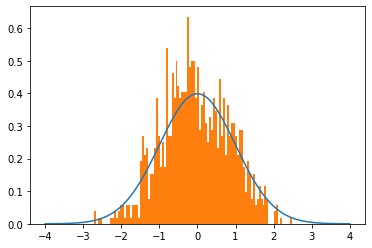

In [202]:
init = 0
theta = proceed_HMC(tau=2, epsilon=0.1, T=1000, N=1000, init=init)
plt.plot(x,p_data)
plt.hist(theta, bins=100,density=True)